In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### https://www.dropbox.com/s/oo9o50jjebjjpor/simple_correlation_100_x_y.npy?dl=0
### https://www.dropbox.com/s/huiy2baip8z68ca/simple_correlation_1000_x_y.npy?dl=0
### https://www.dropbox.com/s/ew850eai3gkk4st/simple_correlation_10000_x_y.npy?dl=0

In [16]:
new_data = np.load('simple_correlation_100_x_y.npy')
x = new_data[0,:]
y = new_data[1,:]

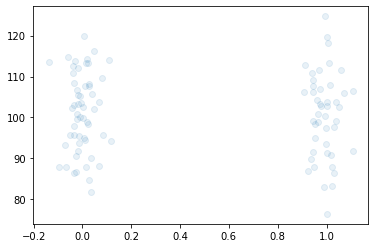

In [18]:
plt.scatter(x+np.random.normal(0,0.05,len(x)),y,alpha=0.1)
#plt.scatter(x,y)

In [8]:
def calculate_signal(x,y):
    search = np.where(x==0)
    est_y_background = np.mean(y[search[0]])  
    search = np.where(x==1)
    mean_y_1= np.mean(y[search[0]])
    return mean_y_1-est_y_background#[search[0]])

In [9]:
measured_signal = calculate_signal(x,y)
print(measured_signal)

-0.5468913258301313


### 1. Write a simple function to calculate the y_0,mean(y) when x==0 and the y_1, mean(y) when x==1
### 2. dy = mean(y_1) - mean(y_0)
### 3. Estimate the uncertainty of dy with error propagation
### 4. Estimate the uncertainty of dy with bootstrap

In [10]:
### normal error propagation
search = np.where(x==0)[0]
y_0_err = np.std(y[search])/np.sqrt(len(search))
search = np.where(x==1)[0]
y_1_err = np.std(y[search])/np.sqrt(len(search))

In [11]:
np.sqrt(y_1_err**2+y_0_err**2)

1.9984419714919832

In [12]:
### Bootstrap error
bootstrap_value = []
bootstrap_time = 500
for i in range(0,bootstrap_time):
    random_index = np.random.randint(0,len(x),len(x))
    bootstrap_value.append(calculate_signal(x[random_index],y[random_index]))

In [13]:
np.std(bootstrap_value)

2.066387281617724

In [15]:
print('dy = %0.2f+-%0.2f' % (measured_signal,np.std(bootstrap_value)))

dy = -0.55+-2.07
